In [1]:
'''
This notebook aims to plot the background and signal TS distributions for each time window
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import argparse
import histlite as hl
import csky as cy
import random

cy.plotting.mrichman_mpl()

timer = cy.timing.Timer()
time = timer.time

#Building/loading MESC data from analysis directory
ana_dir = cy.utils.ensure_dir('/data/user/mkovacevich/FRB_analysis/cascades_ana')
repo = cy.selections.Repository()
ana = cy.get_analysis(repo, cy.selections.MESEDataSpecs.mesc_7yr, dir=ana_dir)

##### Defining functions to compute flux ######    
def ndarray_to_TSD(trials):
    return cy.dists.TSD(cy.utils.Arrays(trials))

def tsd_merge(x):
    ts_values = np.concatenate([xx[0] for xx in x])
    n_zero = sum(xx[1] for xx in x)
    return cy.dists.TSD(ts_values, n_zero=n_zero)

def find_n_sig(beta=0.9, nsigma=None):
    # get signal trials, background distribution, and trial runner
    sig_trials = cy.bk.get_best(sig, 'n_sig')
    #b = cy.bk.get_best(bg) #, 'gamma', gamma, 'dt', dt)
    b = bg
    src = cy.sources(FRB_ra_rad, FRB_dec_rad, mjd = FRB_mjd_time, sigma_t = np.zeros_like(FRB_ra_rad), t_100 = FRB_time_window)
    conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(gamma)}
    tr = cy.get_trial_runner(conf, src = src, ana=ana)
    # determine ts threshold
    if nsigma is not None:
        ts = b.isf_nsigma(nsigma)
    else:
        ts = b.median()
    # include background trials in calculation
    trials = {0: tr.get_many_fits(10000)}
    trials.update(sig_trials)
    # get number of signal events
    # (arguments prevent additional trials from being run)
    result = tr.find_n_sig(ts, beta, max_batch_size=0, logging=False, trials=trials, n_bootstrap=1)
    # return flux
    return tr.to_E2dNdE(result, E0=1e5)

In [4]:
#Loading the background trials to save time
bg = cy.bk.get_all(
    '/data/user/mkovacevich/FRB_analysis/trials/bg/dt/0.01/',
    'bg_trials_seed_*.0.npy',
    pre_convert=lambda x: (x['ts'][x['ts'] > 0], np.sum(x['ts'] == 0)),
    merge = tsd_merge,
    log=True)

100 files loaded.                                                                 


In [4]:
### Plotting all plots in 1 panel ###
bg_trials = {}

#loading smallest and largest time windows bg trials
time_dt = np.logspace(-2, 5, 2)

cy.CONF['ana'] = ana
cy.CONF['mp_cpus'] = 10.0

#Loading bg trials to save time
for dt in time_dt:
    bg_trials[dt] = cy.bk.get_all(
    '/data/user/mkovacevich/FRB_analysis/trials/bg/dt/{}/'.format(dt),
    'bg_trials_seed_*.0.npy',
    pre_convert=lambda x: (x['ts'][x['ts'] > 0], np.sum(x['ts'] == 0)),
    merge = tsd_merge,
    log=True)

100 files loaded.                                                                 
500 files loaded.                                                                     


float64
Performing 1000 trials with n_sig = 1.000 using 15.0 cores:
       1000/1000 trials complete.   
Performing 1000 trials with n_sig = 2.000 using 15.0 cores:
       1000/1000 trials complete.   

0:00:46.841709 elapsed.
float64
Performing 1000 trials with n_sig = 1.000 using 15.0 cores:
       1000/1000 trials complete.   
Performing 1000 trials with n_sig = 2.000 using 15.0 cores:
       1000/1000 trials complete.   

0:00:47.719539 elapsed.
float64
Performing 1000 trials with n_sig = 1.000 using 15.0 cores:
       1000/1000 trials complete.   
Performing 1000 trials with n_sig = 2.000 using 15.0 cores:
       1000/1000 trials complete.   

0:00:46.552170 elapsed.
float64
Performing 1000 trials with n_sig = 1.000 using 15.0 cores:
       1000/1000 trials complete.   
Performing 1000 trials with n_sig = 2.000 using 15.0 cores:
       1000/1000 trials complete.   

0:00:46.898615 elapsed.
float64
Performing 1000 trials with n_sig = 1.000 using 15.0 cores:
       1000/1000 trials 

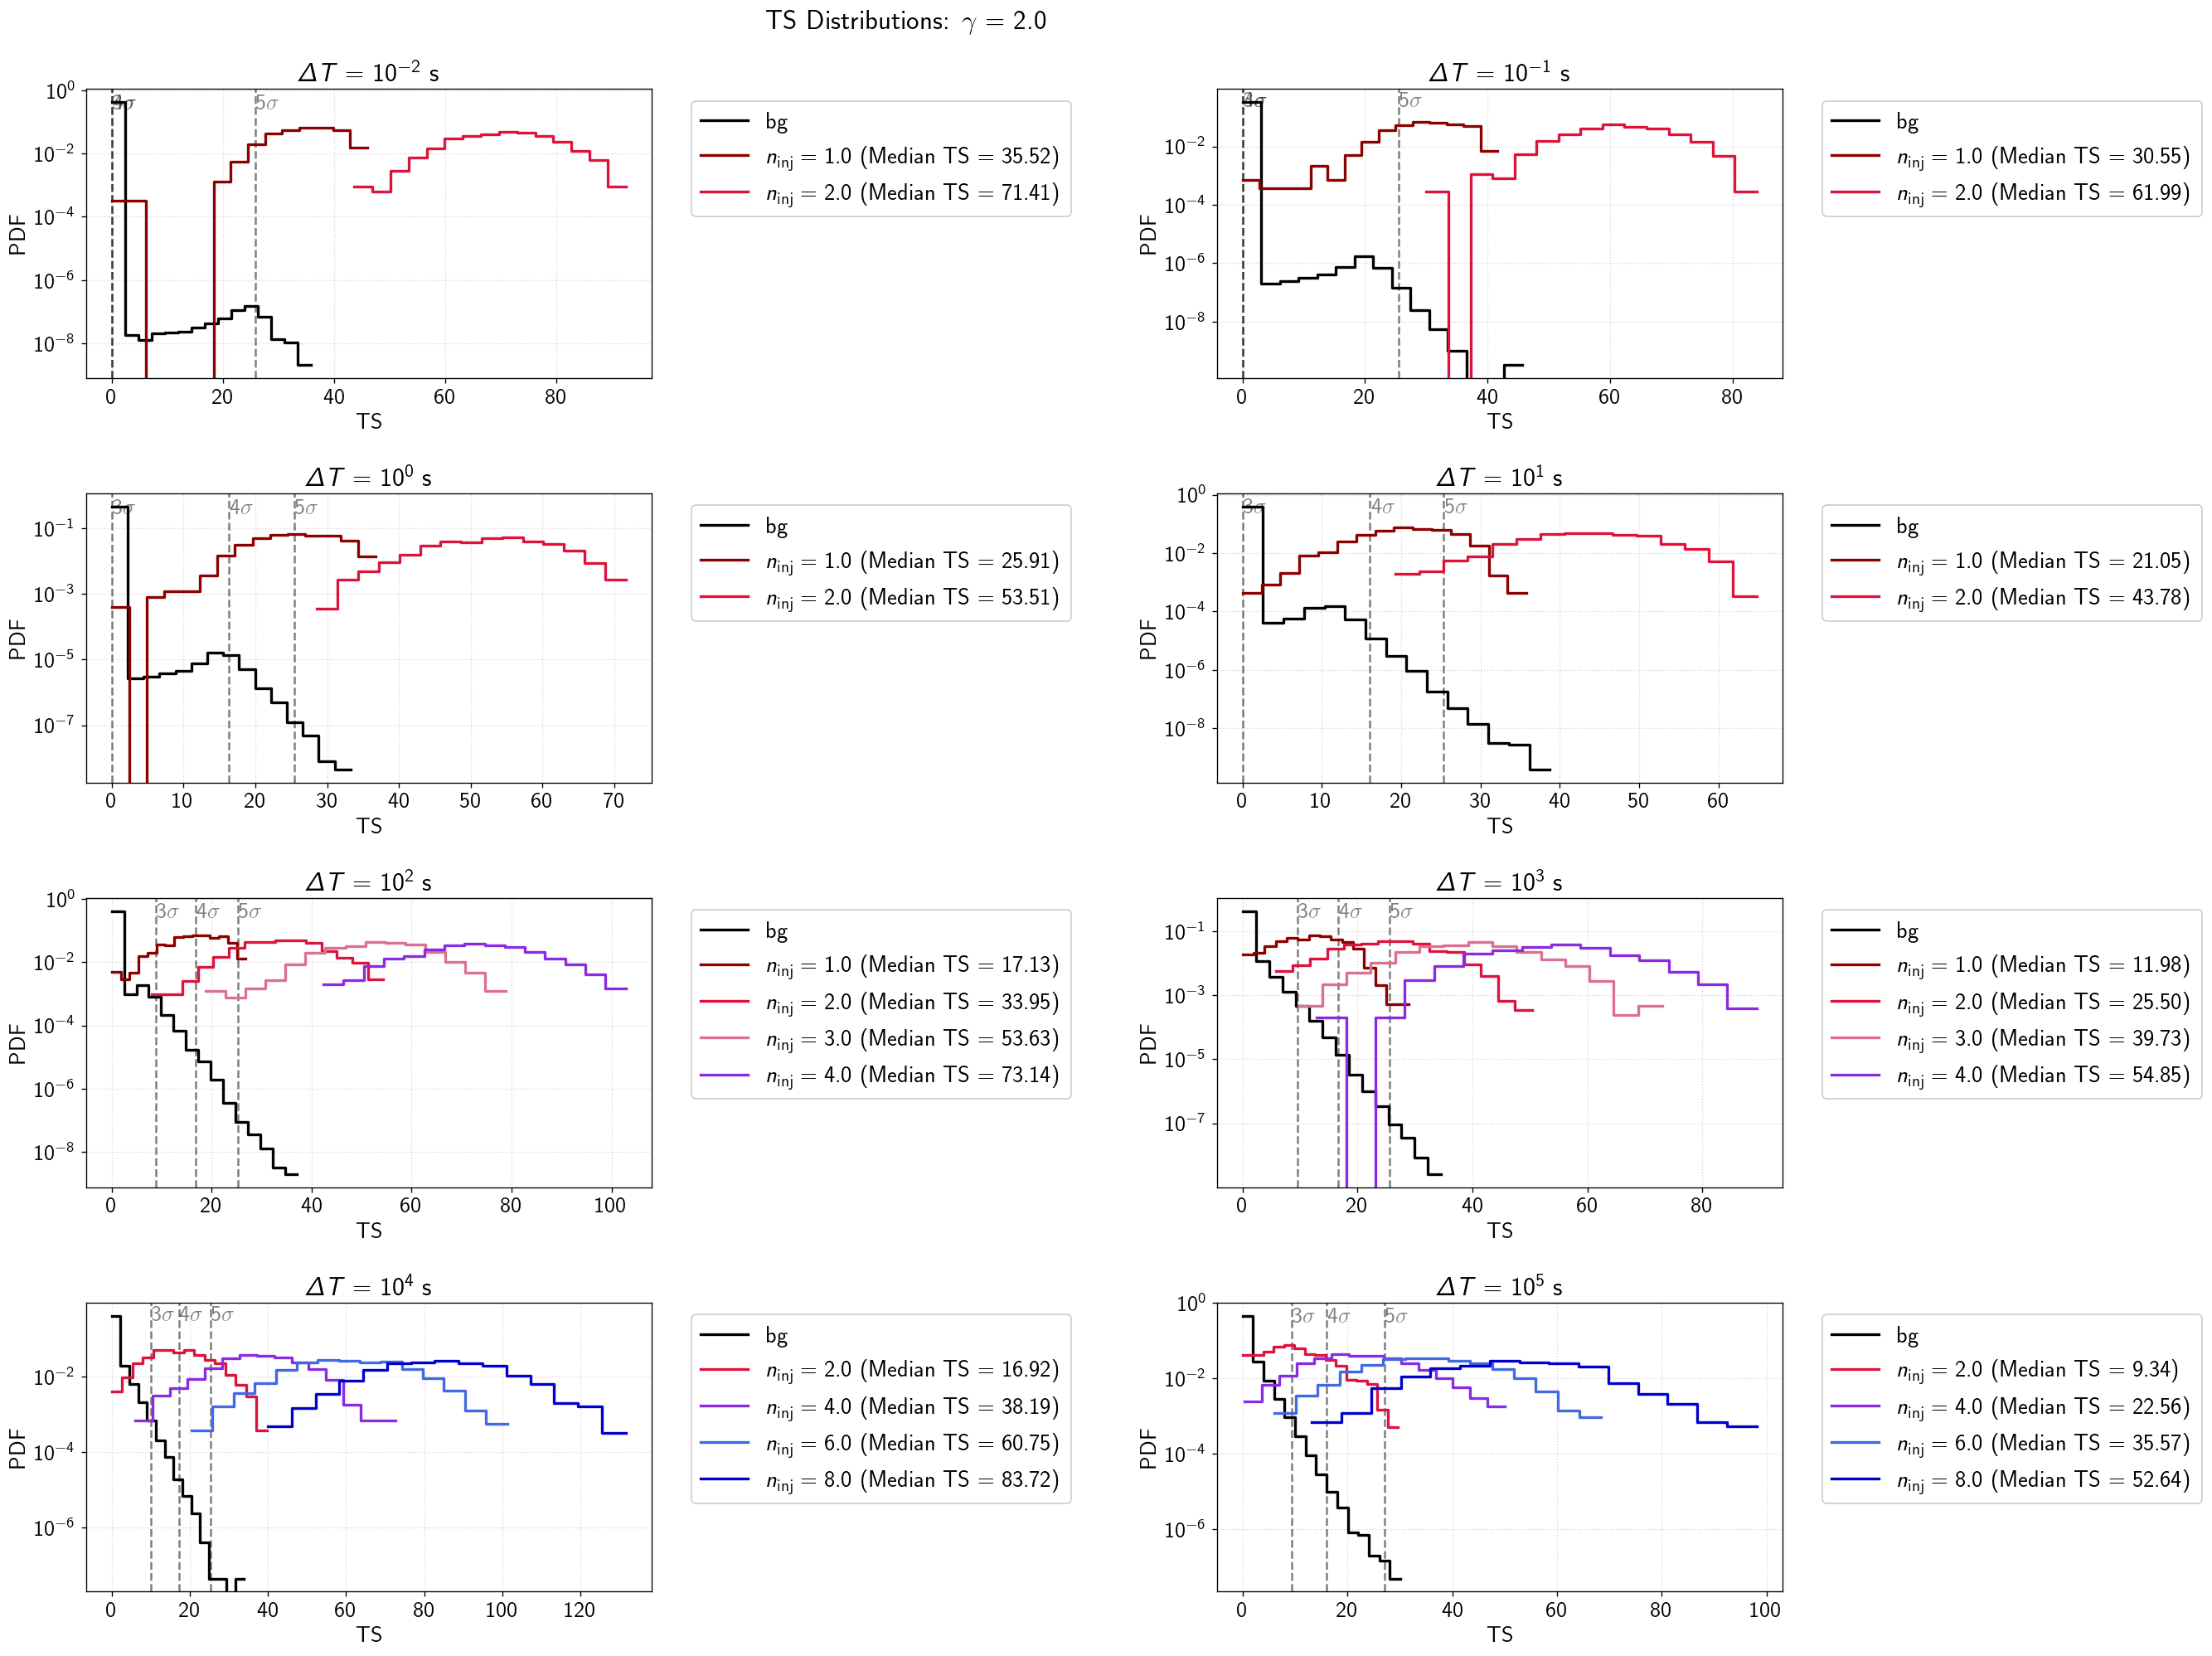

In [62]:
#Plotting the background and signal TS distributions for all time windows

plt.rcParams['font.size'] = '16'
fig, axs = plt.subplots(4, 2, figsize=(22,20))

time_dt = np.logspace(-2, 5, 8)
gamma = 2.0

title = fr'TS Distributions: $\gamma={gamma:.1f}$'

n_sigs = [1.0, 2.0, 3.0, 4.0, 6.0, 8.0]
color = ['darkred', 'crimson', 'palevioletred', 'blueviolet', 'royalblue', 'mediumblue']
color_dict = dict(zip(n_sigs, color))

for (ax, i) in zip(axs.ravel(), time_dt):
    
    dt = i
    bg = bg_trials[i]
    cy.CONF['ana'] = ana
    cy.CONF['mp_cpus'] = 15.0

    FRB_mjd_time = [57760.83732799769, 57547.161818148146, 57488.35670925926, 57464.37542280093, 57389.35323349537, 57386.67762181713, 57362.262416412035, 57241.74578506944, 57183.22707634259, 57130.18688260417, 57068.86228835648, 56791.718183564815, 56600.752907407405, 56502.376286921295, 56471.165279837965, 56469.62221957176, 56202.5481300463, 55953.341223668984, 55745.79144221065, 55738.89811894676, 55704.629394675925, 55612.080417777775]

    FRB_ra_rad = [2.979102500229121, 1.992642407001926, 2.2750366799746087, 2.0673424989872835, 5.928883469024737, 2.534392606820966, 5.067563483165536, 5.945115031068284, 2.811899957888065, 1.9050268785518107, 4.788485335771643, 5.9082885838512045, 1.7634806762150708, 3.5838590860451562, 2.369458992507502, 4.306948995146407, 4.776966162708479, 6.087184832180623, 6.1559508047091995, 5.514018705825685, 5.695009349257497, 5.910732044803997]

    FRB_dec_rad = [-0.08691739674931762, -0.6841690667817772, 0.10611601852125524, -0.4954989746411902, -0.5204571829447091, -0.0445058959258554, -0.06754424205218056, -0.9585348251952858, -0.6965609044709369, -0.33143802495372315, -0.054105206811824215, -0.2040289895581371, -0.8852309966115239, -0.06981317007977318, 0.060039326268604934, -0.11414453308042916, -1.4800392056911915, -0.3066543495754037, -0.01972222054753592, -0.755029434412747, 0.00027925268031909274, -0.20245819323134223]

    FRB_time_window = np.ones_like(FRB_ra_rad)*dt/86400.

    #using a random seed enables the use of different MC when scrambling
    rand_seed = random.randint(0, 1e5)

    src = cy.sources(FRB_ra_rad, FRB_dec_rad, mjd = FRB_mjd_time, sigma_t = np.zeros_like(FRB_ra_rad), t_100 = FRB_time_window)
    conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(gamma)}
    tr = cy.get_trial_runner(conf, src = src, ana=ana)

    if dt <= 8.0:
        n_sigs = np.r_[1.0:2.1:1.0]

    elif (dt > 10.0 and dt < 10000.0):
        n_sigs = np.r_[1.0:4.1:1.0]
        
    elif (dt == 10000.0):
        n_sigs = np.r_[2.0:8.1:2.0]
        
    elif (dt == 100000.0):
        n_sigs = np.r_[2.0:8.1:2.0]
        
    print(n_sigs.dtype)
    with time('ps fit bias trials'):
        trials = [tr.get_many_fits(1000, n_sig=n_sig, logging=True, seed=random.randint(0, 1e5), poisson = False) for n_sig in n_sigs]

    sigma = [3,4,5]
    pow = np.log10(dt)
    plot_title = fr'$\Delta T=10^{{{pow:.0f}}}$ s'
    
    #bins=np.r_[:31:2]
    bins = 15
    h = bg.get_hist(bins = bins)
    hl.plot1d(ax, h.normalize(), color='black',label='bg')
    for i in sigma:
        ax.axvline(bg.isf_nsigma(i),color='k', ls='--', lw = 1.5, alpha = .5) 
        ax.text(bg.isf_nsigma(i)+.15, .8, r'{}$\sigma$'.format(i), ha='left', va='top', alpha=.5)
    
    color_divisor = 8.0
    for (n_sig, t) in zip(n_sigs, trials):
        
        hl.plot1d(ax, hl.hist(t.ts, bins=bins).normalize(),
                      color=color_dict[n_sig], lw = 2.0, label=fr'$n_\text{{inj}}={n_sig}$ (Median TS = {np.median(t.ts):.2f})') 

    ax.legend(bbox_to_anchor=(1.05, 1), prop={'size': 17})
    ax.set_xlabel('TS')
    ax.set_ylabel('PDF')
    ax.set_title(plot_title)
    ax.semilogy()
    ax.grid(alpha = .5)
    
fig.suptitle(title, y = .92, fontsize=20) 
plt.subplots_adjust(wspace = 1.0, hspace=.4)
fig.savefig(f'/home/mkovacevich/public_html/Qual/Ninj_Distributions_Gamma_{gamma}.png'.format(gamma),bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(10,12))
time_dt = np.logspace(-2, 5, 8) 
gamma = 3.0
title = fr'TS Distributions: $\gamma={gamma:.1f}'

n_sigs = [1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 10, 14]
color = ['darkred', 'crimson', 'palevioletred', 'blueviolet', 'royalblue', 'mediumblue', 'green', 'mediumseagreen']
color_dict = dict(zip(n_sigs, color))

for (ax, i) in zip(axs.ravel(), time_dt):
    
    dt = i
    bg = bg_trials[i]
    
    cy.CONF['ana'] = ana
    cy.CONF['mp_cpus'] = 15.0

    FRB_mjd_time = [57760.83732799769, 57547.161818148146, 57488.35670925926, 57464.37542280093, 57389.35323349537, 57386.67762181713, 57362.262416412035, 57241.74578506944, 57183.22707634259, 57130.18688260417, 57068.86228835648, 56791.718183564815, 56600.752907407405, 56502.376286921295, 56471.165279837965, 56469.62221957176, 56202.5481300463, 55953.341223668984, 55745.79144221065, 55738.89811894676, 55704.629394675925, 55612.080417777775]

    FRB_ra_rad = [2.979102500229121, 1.992642407001926, 2.2750366799746087, 2.0673424989872835, 5.928883469024737, 2.534392606820966, 5.067563483165536, 5.945115031068284, 2.811899957888065, 1.9050268785518107, 4.788485335771643, 5.9082885838512045, 1.7634806762150708, 3.5838590860451562, 2.369458992507502, 4.306948995146407, 4.776966162708479, 6.087184832180623, 6.1559508047091995, 5.514018705825685, 5.695009349257497, 5.910732044803997]

    FRB_dec_rad = [-0.08691739674931762, -0.6841690667817772, 0.10611601852125524, -0.4954989746411902, -0.5204571829447091, -0.0445058959258554, -0.06754424205218056, -0.9585348251952858, -0.6965609044709369, -0.33143802495372315, -0.054105206811824215, -0.2040289895581371, -0.8852309966115239, -0.06981317007977318, 0.060039326268604934, -0.11414453308042916, -1.4800392056911915, -0.3066543495754037, -0.01972222054753592, -0.755029434412747, 0.00027925268031909274, -0.20245819323134223]

    FRB_time_window = np.ones_like(FRB_ra_rad)*dt/86400.

    #using a random seed enables the use of different MC when scrambling
    rand_seed = random.randint(0, 1e5)

    src = cy.sources(FRB_ra_rad, FRB_dec_rad, mjd = FRB_mjd_time, sigma_t = np.zeros_like(FRB_ra_rad), t_100 = FRB_time_window)
    conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(gamma)}
    tr = cy.get_trial_runner(conf, src = src, ana=ana)

    if dt <= 10.0:
        n_sigs = np.r_[1.0:2.1:1.0]

    elif (dt > 10.0 and dt < 10000.0):
        n_sigs = np.r_[1.0:4.1:1.0]
        
    elif (dt == 10000.0):
        n_sigs = np.r_[2.0:8.1:2.0]
        
    elif (dt == 100000.0):
        n_sigs = np.r_[2.0:14.1:4.0]

    print(n_sigs.dtype)
    with time('ps fit bias trials'):
        trials = [tr.get_many_fits(1000, n_sig=n_sig, logging=True, seed=random.randint(0, 1e5), poisson = False) for n_sig in n_sigs]

    for t in trials:
        t['mlog10p'] = bg.sf(t.ts)
        t['nsigma'] = bg.sf_nsigma(t.ts)

    sigma = [3,4,5]
    pow = np.log10(dt)
    plot_title = fr'$\Delta T=10^{{{pow:.0f}}}$ s'
    
    bins= 15 #np.r_[:31:2]
    h = bg.get_hist(bins = bins)
    hl.plot1d(ax, h.normalize(), color='black', lw=,label='bg')
    for i in sigma:
        ax.axvline(bg.isf_nsigma(i),color='k', ls='--', lw = 1.5, alpha = .5) 
        ax.text(bg.isf_nsigma(i)+.1, .8, r'{}$\sigma$'.format(i), ha='left', va='top', alpha=.5)

    for (n_sig, t) in zip(n_sigs, trials):
        color = plt.get_cmap('plasma')(n_sig/5)
        hl.plot1d(ax, hl.hist(t.ts, bins=bins).normalize(),
                      color=color_dict[n_sig], lw = 2.0, label=fr'$n_\text{{inj}}={n_sig}$ (Median TS = {np.median(t.ts):.2f})')  

    ax.legend(bbox_to_anchor=(1.05, 1))
    ax.set_xlabel('TS')
    ax.set_ylabel('PDF')
    ax.set(ylim=(1e-8,1))
    ax.set_title(plot_title)
    ax.semilogy()
    ax.grid(alpha = .5)
    
fig.suptitle(title, y = .92, fontsize=20) 
plt.subplots_adjust(wspace = 1.0, hspace=.4)
fig.savefig('/home/mkovacevich/public_html/plots/N_inj/Bg_Sig_TSD_gamma_{}.png'.format(gamma),bbox_inches='tight')